# Week 6 Lab: Lexical Semantics

This week we turn our attention to lexical semantics, i.e., the meaning of words.  In this lab, you will be
* exploring the WordNet resource
* learning about lexical relations such as synonymy and hyponymy
* quantifying semantic similarity via distance in the WordNet hierarchy
* comparing WordNet similarity scores with human synonymy judgements




In [ ]:
###uncomment if working on colab

#from google.colab import drive
#drive.mount('/content/drive')


First, lets import WordNet from the nltk library

In [ ]:
#import nltk
#nltk.download('wordnet')
#nltk.download('wordnet_ic')

from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic


## Navigating WordNet

Central to the organisation of WordNet is the idea of a synset.  Words have senses and senses are grouped with synonymous senses (of other words) in **synsets**

If you want to find out which synsets a word belongs to, you use the `synsets` function.  

In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets("plant")

[Synset('plant.n.01'),
 Synset('plant.n.02'),
 Synset('plant.n.03'),
 Synset('plant.n.04'),
 Synset('plant.v.01'),
 Synset('implant.v.01'),
 Synset('establish.v.02'),
 Synset('plant.v.04'),
 Synset('plant.v.05'),
 Synset('plant.v.06')]

The output is a list of `Synset` objects each of which has a unique identifier containing one of its words, its part of speech and a number.  `Synset('book.n.01')` is the first noun sense of *book*.  However the word book is also in `Synset('record.n.05')` which is the fifth noun sense of *record*.  Lets inspect this synset further.

In [ ]:
book_synsets=wn.synsets('book')
recordn5=book_synsets[2]
print(recordn5.lemma_names())  #get the words in the synset
print(recordn5.definition())   #get the definition of the synset
print(recordn5.examples())  #get examples of the words used in this sense

['record', 'record_book', 'book']
a compilation of the known facts regarding something or someone
["Al Smith used to say, `Let's look at the record'", 'his name is in all the record books']


In [ ]:
plant_synsets=wn.synsets('plant')
for i,s in enumerate(plant_synsets):
    print("{}:{}".format(i+1,s.definition()))

1:buildings for carrying on industrial labor
2:(botany) a living organism lacking the power of locomotion
3:an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience
4:something planted secretly for discovery by another
5:put or set (seeds, seedlings, or plants) into the ground
6:fix or set securely or deeply
7:set up or lay the groundwork for
8:place into a river
9:place something or someone in a certain position in order to secretly observe or deceive
10:put firmly in the mind


If you only want to find synsets associated with a particular part of speech of a word then you can give `synsets` an extra argument

In [ ]:
#all of the WN POS tags
parts_of_speech=[wn.NOUN,wn.VERB,wn.ADJ,wn.ADV]

print(wn.synsets("red",parts_of_speech[0]))


[Synset('red.n.01'), Synset('red.n.02'), Synset('bolshevik.n.01'), Synset('loss.n.06')]


### Exercise 1.1
* Write code to compute the number of synsets of each part of speech (noun, verb, adjective and adverb) for each of the following words:- book, chicken, counter, twig, fast, plant
* Store and display the information using a Pandas dataframe

Hint: you could use a nested list comprehension

In [ ]:
import pandas as pd
words=["book","chicken","counter","twig","fast","plant"]

results=[[len(wn.synsets(word,pos)) for pos in parts_of_speech]for word in words]

df =pd.DataFrame(results,index=words,columns=parts_of_speech)
df

,n,v,a,r
book,11,4,0,0
chicken,4,0,1,0
counter,9,2,1,1
twig,1,2,0,0
fast,1,2,10,2
plant,4,6,0,0


The `Synset` object has a `lemmas()` method which returns all of the lemmas / word senses which make up that synset.  Remember, it is one sense of each word which is considered as synonymous within the synset.  Not every sense of *plant* is considered synonymous with every sense of *works*.  

In [ ]:
for i,s in enumerate(plant_synsets):
    print("{}:{}".format(i,s.lemmas()))

0:[Lemma('plant.n.01.plant'), Lemma('plant.n.01.works'), Lemma('plant.n.01.industrial_plant')]
1:[Lemma('plant.n.02.plant'), Lemma('plant.n.02.flora'), Lemma('plant.n.02.plant_life')]
2:[Lemma('plant.n.03.plant')]
3:[Lemma('plant.n.04.plant')]
4:[Lemma('plant.v.01.plant'), Lemma('plant.v.01.set')]
5:[Lemma('implant.v.01.implant'), Lemma('implant.v.01.engraft'), Lemma('implant.v.01.embed'), Lemma('implant.v.01.imbed'), Lemma('implant.v.01.plant')]
6:[Lemma('establish.v.02.establish'), Lemma('establish.v.02.found'), Lemma('establish.v.02.plant'), Lemma('establish.v.02.constitute'), Lemma('establish.v.02.institute')]
7:[Lemma('plant.v.04.plant')]
8:[Lemma('plant.v.05.plant')]
9:[Lemma('plant.v.06.plant'), Lemma('plant.v.06.implant')]


Access the word form of a `Lemma` using its `names()` method.

In [ ]:
cat_synsets = wn.synsets("cat",wn.NOUN)
for i,s in enumerate(cat_synsets):
    wordforms=[l.name() for l in s.lemmas()]
    print("{}:{}\n\t{}".format(i,wordforms,s.definition()))

0:['cat', 'true_cat']
	feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
1:['guy', 'cat', 'hombre', 'bozo']
	an informal term for a youth or man
2:['cat']
	a spiteful woman gossip
3:['kat', 'khat', 'qat', 'quat', 'cat', 'Arabian_tea', 'African_tea']
	the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
4:["cat-o'-nine-tails", 'cat']
	a whip with nine knotted cords
5:['Caterpillar', 'cat']
	a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
6:['big_cat', 'cat']
	any of several large cats typically able to roar and living in the wild
7:['computerized_tomography', 'computed_tomography', 'CT', 'computerized_axial_tomography', 'computed_axial_tomography', 'CAT']
	a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans alon

The `Synset` object also has `hyponyms` and `hypernyms` methods which return hyponym and hypernym synsets respectively.

For example:

In [ ]:
#getting back the list of hyponym synsets for recordn5 (the 5th noun sense of record)
recordn5.hyponyms()

[Synset('card.n.08'), Synset('logbook.n.01'), Synset('won-lost_record.n.01')]

In [ ]:
#iterating over the hyponyms of the 6th Synset in the list of synsets for cat
for h in cat_synsets[6].hyponyms():
    h_words=[w.name() for w in h.lemmas()]
    print("{}:{}".format(h_words,h.definition()))

['cheetah', 'chetah', 'Acinonyx_jubatus']:long-legged spotted cat of Africa and southwestern Asia having nonretractile claws; the swiftest mammal; can be trained to run down game
['jaguar', 'panther', 'Panthera_onca', 'Felis_onca']:a large spotted feline of tropical America similar to the leopard; in some classifications considered a member of the genus Felis
['leopard', 'Panthera_pardus']:large feline of African and Asian forests usually having a tawny coat with black spots
['liger']:offspring of a male lion and a female tiger
['lion', 'king_of_beasts', 'Panthera_leo']:large gregarious predatory feline of Africa and India having a tawny coat with a shaggy mane in the male
['saber-toothed_tiger', 'sabertooth']:any of many extinct cats of the Old and New Worlds having long swordlike upper canine teeth; from the Oligocene through the Pleistocene
['snow_leopard', 'ounce', 'Panthera_uncia']:large feline of upland central Asia having long thick whitish fur
['tiger', 'Panthera_tigris']:large

In [ ]:
##Iterating over the hypernyms of the 6th sense of cat and output lemma names and definition
for h in cat_synsets[6].hypernyms():
    h_words=[w.name() for w in h.lemmas()]
    print("{}:{}".format(h_words,h.definition()))

['feline', 'felid']:any of various lithe-bodied roundheaded fissiped mammals, many with retractile claws


As an alternative to calling .names() on the Lemmas associated with a Synset, you can also use the .lemma_names() method directly on a synset.

In [ ]:
for h in recordn5.hypernyms():
  print(h.lemma_names())

['fact']


Since the hyponymy relation forms a tree, we would expect synsets to generally have multiple hyponyms and a single hypernym.  At the top of the tree (also called the **root**), the hypernym list will be empty.  Most noun concepts in WordNet share a common root hypernym which is *entity*.  At the bottom of the tree (also referred to as the **leaves** of the tree), the hyponym list will be empty

### Exercise 1.2
Write a function, `distance_to_root` that will take a Synset and traverse up the tree until it reaches a root of the tree.  When it does so, it should return the number of steps taken.

Hint: This can be done using **recursion**, where a function repeatedly calls itself.  You need to define:
* a base case:  How will the function know when it is at the top of the tree and what should it return?
* a recursive step: In the general case, the function should call itself with a simpler problem (a Synset which is closer to the top of the tree).  When it gets the result of this function call, it needs to modify it in some way and then return its own answer

Make sure you test your function.  You should find that the 5th noun sense of record is 6 steps from the top.

How far are all of the other noun sense of book from a root of the tree?




In [ ]:
def distance_to_root(asynset):
    #print(asynset.lemma_names())
    hypernyms=asynset.hypernyms()
    if len(hypernyms)==0:
        #reached the top and have to stop
        return 0
    else:
        if len(hypernyms)>1:
            print("Warning: multiple hypernyms")
        return (distance_to_root(hypernyms[0])+1)
    
for asynset in wn.synsets('plant',wn.NOUN):
    print(asynset.lemma_names(),distance_to_root(asynset))

['plant', 'works', 'industrial_plant'] 7
['plant', 'flora', 'plant_life'] 6
['plant'] 7
['plant'] 10


## Semantic Similarity in WordNet

The simplest way of defining how similar two concepts are according to WordNet is to use the pathlength measure:

\begin{eqnarray*}
\mbox{sim}(\mbox{synsetA},\mbox{synsetB})=\frac{1}{1+\mbox{lengthOfPath}(\mbox{synsetA},\mbox{synsetB})}
\end{eqnarray*}

We have also introduced other measures in the lectures which incorporate **information content**, i.e., the amount of information we receive when a word from a given synset is used (there is more information in being told that something is a *poodle* than in being told it is an *animal*).

The `nltk.wn` module has built-in functions for computing these similarities between synsets.

In [ ]:
books=wn.synsets("book",wn.NOUN)
print("path_similarity {}".format(wn.path_similarity(books[0],books[1])))

brown_ic=wn_ic.ic("ic-brown.dat")  #this gets information content data from the Brown corpus
print("resnik_similarity {}".format(wn.res_similarity(books[0],books[1],brown_ic)))
print("lin_similarity {}".format(wn.lin_similarity(books[0],books[1],brown_ic)))

path_similarity 0.2
resnik_similarity 5.454686565783099
lin_similarity 0.7098990245459575


Note it is impossible to compare synsets of different parts of speech using these methods because they are not connected via hyponymy

In [ ]:
booksN=wn.synsets("book",wn.NOUN)
booksV=wn.synsets("book",wn.VERB)
print("path_similarity {}".format(wn.path_similarity(booksN[0],booksV[1])))
print("resnik_similarity {}".format(wn.res_similarity(booksN[0],booksV[1],brown_ic)))
print("lin_similarity {}".format(wn.lin_similarity(booksN[0],booksV[1],brown_ic)))

path_similarity 0.058823529411764705


WordNetError: Computing the least common subsumer requires Synset('book.n.01') and Synset('reserve.v.04') to have the same part of speech.

### Exercise 2.1

The similarity of two **words** with a given part of speech is defined as the **maximum** similarity of all possible sense pairings.  If word A has 5 noun senses and word B has 4 noun senses than there are 20 possible sense pairings to check.

* Write a function which will compute the path_similarity of two nouns.
* Make sure you test it.  The correct answer for *chicken* and *car* is 0.0909 to 3SF

In [ ]:
def path_similarity(wordA,wordB,pos=wn.NOUN):
    synsetsA=wn.synsets(wordA,pos)
    synsetsB=wn.synsets(wordB,pos)
    maxsofar=0
    for synsetA in synsetsA:
        for synsetB in synsetsB:
            sim=wn.path_similarity(synsetA,synsetB)
            if sim>maxsofar:
                maxsofar=sim
    return maxsofar

path_similarity("chicken","car")

0.09090909090909091

### Exercise 2.2
Generalise your path_similarity function so that it takes an extra optional argument:
* the similarity measure to use


In [ ]:
def word_similarity(wordA,wordB,pos=wn.NOUN,measure="path"):
    synsetsA=wn.synsets(wordA,pos)
    synsetsB=wn.synsets(wordB,pos)
    maxsofar=0
    brown_ic=wn_ic.ic("ic-brown.dat")
    for synsetA in synsetsA:
        for synsetB in synsetsB:
            if measure=="path":
                sim=wn.path_similarity(synsetA,synsetB)
            elif measure=="res":
                sim=wn.res_similarity(synsetA,synsetB,brown_ic)
            elif measure=="lin":
                sim=wn.lin_similarity(synsetA,synsetB,brown_ic)
            
            if sim>maxsofar:
                maxsofar=sim
    return maxsofar

In [ ]:
word_similarity("chicken","car",measure="lin")

0.17900106582025765

## Comparing WordNet Similarities with Human Synonymy Judgements

The file `mcdata.csv` contains human synonymy judgements for a list of 30 noun pairs.   We can read in a `.csv` file using the `csv` library 

In [ ]:
import csv
import os
directory='/content/drive/My Drive/NLE Notebooks/Week5LabsSolutions/'
filename='mcdata.csv'
filepath=os.path.join(directory,filename)


with open(filename,'r') as filestream:
    mcdata=list(csv.reader(filestream,delimiter=','))

df=pd.DataFrame(mcdata,columns=["word1","word2","human similarity"])
#lets make sure the scores are floats not strings.  We can do this by applying the float() function to every value in the column (which we can using map)
df["human similarity"]=df["human similarity"].map(float)

In [ ]:
df.describe()

,human similarity
count,30.000000
mean,1.929000
std,1.419979
min,0.080000
25%,0.682500
50%,1.670000
75%,3.342500
max,3.920000


Note that the human similarity judgements range between 0 and 4.

### Exercise 3.1
Write code that will 
* compute the WordNet path_similarity for every pair of words in this data; and
* add it as a column in the dataframe.  If you have the path similarity scores in a list called `scores`, you can do this using `df['path']=scores`

Repeat for the Resnik and Lin similarity scores.


In [ ]:
measures=["path","res","lin"]
for measure in measures:
    scores=[]

    for triple in mcdata:
        scores.append(word_similarity(triple[0],triple[1],measure=measure))
    df[measure]=scores
    
df

,word1,word2,human similarity,path,res,lin
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584
1,bird,cock,3.05,0.500000,7.677755,0.773937
2,bird,crane,2.97,0.250000,7.677755,0.747812
3,boy,lad,3.76,0.500000,8.399492,0.830562
4,brother,monk,2.82,0.500000,9.261593,0.986407
5,car,automobile,3.92,1.000000,7.591401,1.000000
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441
7,chord,smile,0.13,0.090909,2.619644,0.246256
8,coast,forest,0.42,0.166667,1.290026,0.130646
9,coast,hill,0.87,0.200000,5.884681,0.599113


We can use pandas functionality to produce scatter plots and examine the correlation between different variables

<AxesSubplot:xlabel='human similarity', ylabel='path'>

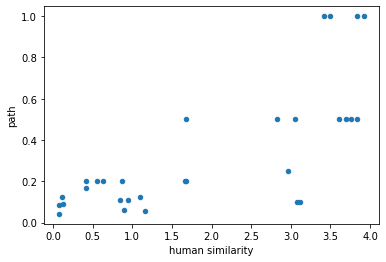

In [ ]:
%matplotlib inline

x="human similarity"
y="path"

df.plot.scatter(x,y)

### Exercise 3.2
Generate scatter plots showing Resnik similarity against human similarity and Lin similarity against human similarity.

<AxesSubplot:xlabel='human similarity', ylabel='res'>

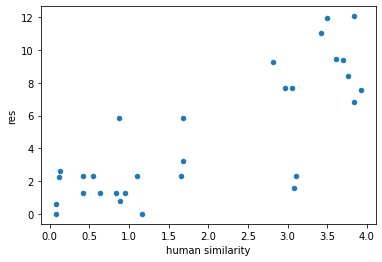

In [ ]:
df.plot.scatter("human similarity","res")

<AxesSubplot:xlabel='human similarity', ylabel='lin'>

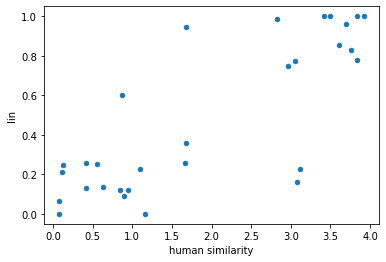

In [ ]:
df.plot.scatter("human similarity","lin")

The `DataFrame.corr()` method will compute the correlation for all pairs of columns with numeric values.  It is better to use Spearman's rank correlation coefficient than Pearson's product-moment correlation coefficient, since similarity scores are unlikely to be normally distributed.

In [ ]:
df.corr(method='spearman')

,human similarity,path,res,lin
human similarity,1.000000,0.722743,0.735945,0.753510
path,0.722743,1.000000,0.900648,0.945509
res,0.735945,0.900648,1.000000,0.962707
lin,0.753510,0.945509,0.962707,1.000000


### Exercise 3.3
* Looking at the scatter plots and the correlation coefficients, what do you conclude about the different WordNet similarity measures?
* Do you have any reservations about your conclusions?